In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("cereals.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1.00
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.50
4,Almond_Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75


In [3]:
col = df[["name", "mfr", "type"]]
cereal = df.drop(["name", "mfr", "type"], axis=1)
cereal = cereal.replace('-1', 0)

In [4]:
col.head()

,name,mfr,type
0,100%_Bran,N,C
1,100%_Natural_Bran,Q,C
2,All-Bran,K,C
3,All-Bran_with_Extra_Fiber,K,C
4,Almond_Delight,R,C


In [5]:
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10,5,6,280,25,3,1,0.33
1,120,3,5,15,2,8,8,135,0,3,1,1.00
2,70,4,1,260,9,7,5,320,25,3,1,0.33
3,50,4,0,140,14,8,0,330,25,3,1,0.50
4,110,2,2,200,1,14,8,0,25,3,1,0.75


In [6]:
cereal.mean()

calories    106.883117
protein       2.545455
fat           1.012987
sodium      159.675325
fiber         2.151948
carbo        14.610390
sugars        6.935065
potass       96.103896
vitamins     28.246753
shelf         2.207792
weight        1.029610
cups          0.821039
dtype: float64

In [7]:
df_normalize = (cereal - cereal.mean()) / (cereal.max() - cereal.min())

In [8]:
df_normalize.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,-0.335301,0.290909,-0.002597,-0.092735,0.560575,-0.417843,-0.062338,0.557261,-0.032468,0.396104,-0.02961,-0.392831
1,0.119244,0.090909,0.797403,-0.452110,-0.010853,-0.287408,0.070996,0.117867,-0.282468,0.396104,-0.02961,0.143169
2,-0.335301,0.290909,-0.002597,0.313515,0.489147,-0.330887,-0.129004,0.678473,-0.032468,0.396104,-0.02961,-0.392831
3,-0.517119,0.290909,-0.202597,-0.061485,0.846289,-0.287408,-0.462338,0.708776,-0.032468,0.396104,-0.02961,-0.256831
4,0.028335,-0.109091,0.197403,0.126015,-0.082282,-0.026539,0.070996,-0.291224,-0.032468,0.396104,-0.02961,-0.056831


In [9]:
df_normalize.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.252349,0.564092,-0.066678,0.265356,0.097234,0.696091,0.087200
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.125337,-0.324112,0.549667,0.007335,0.133865,0.216158,-0.244469
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318504,0.275086,0.193371,-0.031156,0.263691,0.214625,-0.175892
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.353990,0.096291,-0.032706,0.361477,-0.069719,0.308576,0.119665
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.359297,-0.141225,0.903647,-0.032243,0.297539,0.247226,-0.513061
carbo,0.252349,-0.125337,-0.318504,0.353990,-0.359297,1.000000,-0.352835,-0.352861,0.257065,-0.107424,0.136016,0.365930
sugars,0.564092,-0.324112,0.275086,0.096291,-0.141225,-0.352835,1.000000,0.022151,0.122000,0.096623,0.452308,-0.034450
potass,-0.066678,0.549667,0.193371,-0.032706,0.903647,-0.352861,0.022151,1.000000,0.020449,0.360974,0.416439,-0.495357
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.257065,0.122000,0.020449,1.000000,0.299262,0.320324,0.128405
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.107424,0.096623,0.360974,0.299262,1.000000,0.190762,-0.335269


###Looking at the above data fiber corelates to potassium (0.90)

In [14]:
new_df = col.join(df_normalize)

In [15]:
new_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,-0.335301,0.290909,-0.002597,-0.092735,0.560575,-0.417843,-0.062338,0.557261,-0.032468,0.396104,-0.02961,-0.392831
1,100%_Natural_Bran,Q,C,0.119244,0.090909,0.797403,-0.452110,-0.010853,-0.287408,0.070996,0.117867,-0.282468,0.396104,-0.02961,0.143169
2,All-Bran,K,C,-0.335301,0.290909,-0.002597,0.313515,0.489147,-0.330887,-0.129004,0.678473,-0.032468,0.396104,-0.02961,-0.392831
3,All-Bran_with_Extra_Fiber,K,C,-0.517119,0.290909,-0.202597,-0.061485,0.846289,-0.287408,-0.462338,0.708776,-0.032468,0.396104,-0.02961,-0.256831
4,Almond_Delight,R,C,0.028335,-0.109091,0.197403,0.126015,-0.082282,-0.026539,0.070996,-0.291224,-0.032468,0.396104,-0.02961,-0.056831


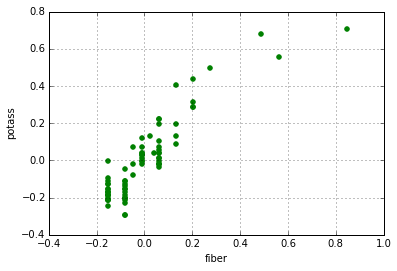

In [16]:
fiber_potassium = new_df[['fiber', 'potass']]
fiber_potassium.plot(kind='scatter', x="fiber", y="potass", color="g")
plt.show()

##KMeans Clustering

In [11]:
kmeans = KMeans(n_clusters=3)

In [18]:
kmeans.fit(df_normalize)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [19]:
kmeans.predict(df_normalize)

array([2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0,
       2, 2, 2, 2, 1, 0, 0, 1], dtype=int32)